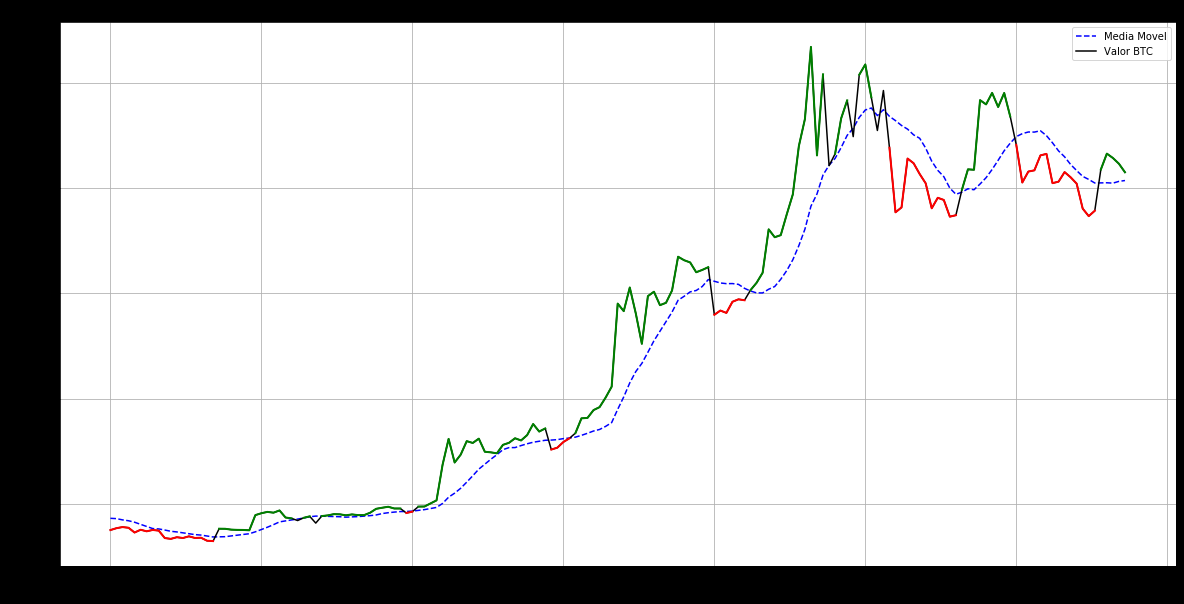

In [ ]:
import numpy as np

In [ ]:
# Leitura e escrita de arquivos de dados

# Muda o diretorio de trabalho
import os
os.chdir("C:\\Users\\engle\\OM Na Pratica\\Python\\Bases de Dados")

In [ ]:
# Carregando o arquivo

# np.loadtxt("seu_arquivo.txt") - Para voce carregar um txt

# Vamos carregar um csv
bitcoin = np.genfromtxt("BTCUSD_08092019.csv", delimiter = ';')

In [ ]:
# Salvando o array em um arquivo no disco

np.savetxt("bitcoin_arquivo.csv", bitcoin, delimiter=";")

In [ ]:
# Investigando o seu array

print("shape: ", bitcoin.shape)
print("len: ", len(bitcoin))
print("ndim: ", bitcoin.ndim) # Apenas 1 dimensao
print("size: ", bitcoin.size)
print("dtype: ", bitcoin.dtype)

In [ ]:
# Operaçoes aritiméticas

ops = np.arange(5)

print("Seu array")
print("ops     =", ops)
print()
print("Adicao")
print("ops + 2 =", ops + 2)
print("Método add  = ", np.add(ops, 2))
print()
print("Subtracao")
print("ops - 2 =", ops - 2)
print("Método subtract  = ", np.subtract(ops, 2))
print()
print("Multiplicacao")
print("ops * 2 =", ops * 2)
print("Método multiply  = ", np.multiply(ops, 2))
print()
print("Divisao")
print("ops / 2 =", ops / 2)
print("Método divide  = ", np.divide(ops, 2))
print()
print("Inteiro da divisao")
print("ops // 2 =", ops // 2)
print()
print("Negativo")
print("-x     = ", -ops)
print()
print("Exponenciacao")
print("ops ** 2 = ", ops ** 2)
print()
print("Modulo")
print("ops % 2  = ", ops % 2)
print()
print("e elevado a:")
print("e^x  = ", np.exp(ops))
print()
print("2 elevado a:")
print("2^x  = ", np.power(2,ops))
print()
print("Raiz quadrada")
print("Raiz = ", np.sqrt(ops))
print()
print("Seno")
print("Seno de ops = ", np.sin(ops))
print()
print("Cosseno")
print("Cosseno de ops = ", np.cos(ops))
print()
print("Tangente")
print("Tangente de ops = ", np.tan(ops))
print()
print("Logaritmo Natural")
print("ln = ", np.log(ops))
print()
print("Logaritmo base 2")
print("log2 = ", np.log2(ops))
print()
print("Logaritmo base 10")
print("log10 = ", np.log10(ops))


In [ ]:
# Operaçoes dentro do array

print("Soma de todos os elementos: ", bitcoin.sum())
print()
print("Valor minimo de todos os elementos: ", bitcoin.min())
print()
print("Valor maximo de todos os elementos: ", bitcoin.max())
print()
print("Valor medio de todos os elementos: ", bitcoin.mean())
print()
print("Mediana de todos os elementos: ", np.median(bitcoin))
print()
print("Desvio padrao: ", np.std(bitcoin))

In [ ]:
# Comparaçoes logicas - voce pode usar qualquer um dos operadores logicos que aprendemos na aula 2

bitcoin > bitcoin.mean()

In [ ]:
bitcoin > (bitcoin.mean() + np.std(bitcoin))

In [ ]:
# Pegar apenas os valores que atendam à uma condiçao

np.ma.masked_where(3600 <= bitcoin, bitcoin)

In [ ]:
# Mas para o que serve mesmo tudo isso?

In [ ]:
def media_movel(seu_array, n = 5):
    valores = np.cumsum(seu_array, dtype=float)
    valores[n:] = valores[n:] - valores[:-n]
    return valores[n - 1:] / n

In [ ]:
# Definicao do valor da média movel

p = 11

In [ ]:
# Grafico de analise de risco

%matplotlib inline

import matplotlib.pyplot as plt

In [ ]:
plt.plot(range(p 
               ,p + len(media_movel(bitcoin, p)))
         , media_movel(bitcoin, p)
         , label = 'Media Movel')
plt.plot(bitcoin, label = "Valor BTC")
plt.title('Valor do Bitcoin de 01/0/2019 a 07/0/2019')
plt.xlabel("Periodo")
plt.ylabel("Preço");
plt.grid()
plt.legend()

In [ ]:
# Deixando o nosso grafico um pouco mais complexo

mm_btc = media_movel(bitcoin, p)


#Ajustando o tamanho do grafico
plt.figure(figsize=(20,10))

# Atributos
# Media movel dos preços
plt.plot(mm_btc
         ,'b--'
         , label = 'Media Movel')

# Preço do Bitcoin
plt.plot(bitcoin[10:]
         , "black"
         , label = "Valor BTC")

# Plot condicional - muda a cor dado uma certa condiçao
bitcoin_under_mm = np.ma.masked_where(mm_btc <= bitcoin[10:], bitcoin[10:])
bitcoin_above_mm = np.ma.masked_where(mm_btc > bitcoin[10:], bitcoin[10:])

plt.plot(bitcoin_under_mm
         , 'r'
         , linewidth=2)

plt.plot(bitcoin_above_mm
         , 'g'
         , linewidth=2)

# Configuraçoes de exibiçao
plt.title("Valor do Bitcoin de 01/0/2019 a 07/0/2019")
plt.xlabel("Periodo")
plt.ylabel("Preço");
plt.grid()
plt.legend()